# IMT2118 - Taller 2.


## 1. Aspectos generales.

- Fecha de entrega: 10 de septiembre 2020, 23:59.

- Formato de entrega: carpeta comprimida (.zip) incluyendo Jupyter Notebook con el desarrollo (puede utilizar este mismo notebook), y las capas o archivos vectoriales que haya generado como parte de su análisis. El objetivo es que **el Notebook pueda correr completamente dentro de la carpeta entregada**. 

- Vía de entrega: a través de Canvas, correo electrónico con archivo adjunto o link para descarga (enviar a la profesora cc. al ayudante del curso).

- El trabajo es invididual, y cada estudiante trabajará con una región de Chile, de acuerdo a lo asignado para la Tarea 1 e indicado en la siguiente tabla:

| Estudiante | Región |
|------------|---------|
|Vicente Agüero |  V|
|Matías Alarcón |  VI|
|Pablo Bahamondes| VII|
|Beatriz Cuervo| VIII|
|Trindad Gatica| IX|
|David Quiroz| X|
|Josefa Silva| XI|
|Daniel Ugalde| XIII|
|Gerardo Ureta| XIV|
|Tomás Valenzuela | XVI |

- El Taller debe ser desarrollada en lenguaje de programación Python. Com parte de su trabajo, puede utilizar QGIS según le acomode para visualizar capas o realizar alguna operación espacial, pero para efectos de la entrega todo debe estar desarrollado en Python.

- Se sugiere hacer consultas y comentarios sobre el Taller a traves del Foro del curso creado en Google Groups.


## 2. Datos para el Taller.

Para el desarrollo de este Taller, utilizaremos los mismos conjuntos de datos requeridos para el desarrollo de la Tarea 1. El objetivo de esta actividad es preparar un subconjunto de datos correspondiente a la región asignada a cada estudiante, de manera de facilitar el resto del trabajo.

#### 2.1 Cartografía Censo 2017

http://www.censo2017.cl/resultados-precenso-2016/#1483043043443-4db741fa-4733

La cartografía censal incluye varias capas de utilidad para este análisis, como por ejemplo:

1. REGION_C17: límites regionales
2. COMUNA_C17: límites comunales
3. MANZANA_IND_C17: manzanas en zonas urbanas
4. MANZANA_ALDEA_C17: manzanas en zonas rurales
5. ENTIDAD_C17: entidares rurales
6. LIMITE_URBANO_CENSAL_C17: límite de las zonas urbanas (dentro de la cual se encuentran las manzanas urbanas).


#### 2.2 Red de hidrográfica de Chile.

Link: https://drive.google.com/file/d/1mHJI-pjI24-Ce45D5YVVt93nbcCox6ii/view?usp=sharing

Capa con todos los ríos, vertientes, lagos y otras fuentes de agua en Chile.

#### 2.3 Sistemas de Agua Potable Rural (APR).

Link: https://dga.mop.gob.cl/estudiospublicaciones/mapoteca/Paginas/default.aspx#cinco

Ubicación de los sistemas de APR administrados por el MOP. Para efectos de este análisis, asumiremos que la información está actualizada, y que estos son los únicos APR existentes, aunque en realidad existen algunos otros financiados por SUBDERE (pero la información georreferenciada no está disponible).

*Nota:* estas suposiciones revelan algunas de las falencias comúnmente encontradas en cuanto a disponibilidad de datos espaciales a nivel público y privado.


#### 2.4 Territorios operacionales de empresas sanitarias.

Link: https://drive.google.com/file/d/1mHJI-pjI24-Ce45D5YVVt93nbcCox6ii/view?usp=sharing

Zonas concesionada a empresas sanitarias de acuerdo a información publicada por la Superintendencia de Servicios Sanitarios (SISS). Corresponde al territorio cubierto por redes públicas de agua potable.

## 4. Desarrollo.

1. A partir de las conjuntos de datos indicados arriba, genere un nuevo conjunto de capas acotados únicamente a la región con la cual le corresponde trabajar, todas en sistema de coordenadas UTM.
2. Genere una figura donde se superpongan todas las capas generadas. Ud. puede definir las propiedades de visualización de cada capa, y no se evaluarán criterios gráficos en la medida que el mapa general de capas superpuestas sea comprensible.
3. A partir de su nuevo conjunto de datos, realice los cálculos necesarios para completar la siguiente tabla:

| Campo | Valor |
|------------|---------|
|Área total (Ha)|  |
|Área total de zonas urbanas (Ha)|  |
|Área total de entidades rurales (Ha)|  |
|Población urbana|  |
|Población rural|  |




In [91]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [92]:
#REGION_C17: límites regionales
#COMUNA_C17: límites comunales
#MANZANA_IND_C17: manzanas en zonas urbanas
#MANZANA_ALDEA_C17: manzanas en zonas rurales
#ENTIDAD_C17: entidares rurales
#LIMITE_URBANO_CENSAL_C17: límite de las zonas urbanas (dentro de la cual se encuentran las manzanas urbanas).
APR_original= gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\APR_DOH_Enero_2016.shp")
APR= gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\APRNVO1.shp") #cortado UTM
Region = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\REGION_C17.shp")
Comuna = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\COMUNA_C17.shp")
Manzana_IND_C17 = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\MANZANA_IND_C17.shp")
Manzana_aldea_C17 = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\MANZANA_ALDEA_C17.shp")
Entidad = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\ENTIDAD_IND_C17.shp")
LUC = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\LIMITE_URBANO_CENSAL_C17.shp")
Operacional = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\territoriosOperacionalesSanitarias.gpkg")
Hidrografia_original = gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\hidrografiaChile.gpkg")
Hidrografia =gpd.read_file(r"C:\Users\Josefa_PUC\OneDrive\Escritorio\r1\mh1.gpkg") #Hidrografia cortada

In [ ]:
Comuna=Comuna.to_crs(crs='EPSG:32718')
Region= Region.to_crs(crs='EPSG:32718')
Manzana_IND_C17= Manzana_IND_C17.to_crs(crs='EPSG:32718')
Manzana_aldea_C17 = Manzana_aldea_C17.to_crs(crs='EPSG:32718')
Entidad = Entidad.to_crs(crs='EPSG:32718')
LUC=LUC.to_crs(crs='EPSG:32718')
Operacional = Operacional.to_crs(crs='EPSG:32718')
Hidrografia = Hidrografia.to_crs(crs='EPSG:32718')

In [112]:
#urbano ciudad
#rural campo

Entidad["area"] = Entidad['geometry'].area
Manzana_aldea_C17["area"] = Manzana_aldea_C17['geometry'].area
Comuna["area"] = Comuna['geometry'].area
Region["area"] = Region['geometry'].area
LUC["area"] = LUC['geometry'].area
Manzana_IND_C17["area"] = Manzana_IND_C17['geometry'].area

print(str("Área total="), sum(Region.area/ 10**6)) #total
print(str("Población rural="), sum(Entidad.TOTAL_PERS) )
print( str("Población urbana="), sum(Manzana_IND_C17.TOTAL_PERS))

aldea=sum(Manzana_aldea_C17.area/10**6) # contiene rurales
urbano=sum(LUC.area/10**6) #urbano

print(str("Área total de entidades rurales="), sum(Entidad.area/10**6)) #area zona rural
print(str("Área zona urbana="), urbano)# urbano
total=sum(Entidad.area/10**6)+ aldea
total2=sum(Manzana_IND_C17.area/10**6+urbano)






Área total= 106939.77205390665
Población rural= 21023
Población urbana= 81144
Área total de entidades rurales= 79793.5555608315
Área zona urbana= 33.17886560576624


In [94]:
nvo= Operacional["REGION"]== 11.0
Operacionalr11 = Operacional[nvo]

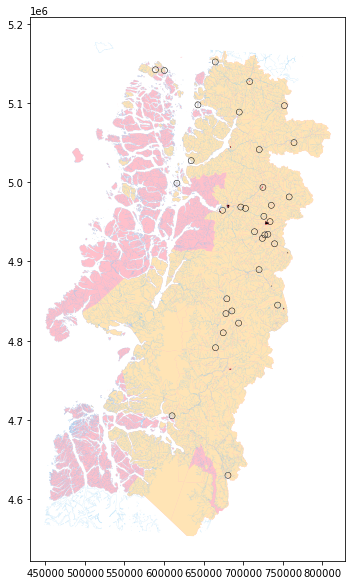

In [121]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.set_aspect('equal')
Hidrografia.plot(ax=ax, color = "lightskyblue", lw=0.1)
Region.plot(ax=ax, color= "pink")
Entidad.plot(ax=ax, color= "moccasin") #rural 
LUC.plot(ax=ax, color= "r") #urbano
APR.plot(ax=ax, color= "None", edgecolor='k',lw=0.5)
Operacionalr11.plot(ax=ax, color="black")
plt.show()